In [16]:
import pandas as pd, seaborn as sns

In [37]:
df = pd.read_csv("pkt.pcap", sep='\t', header=None)

In [70]:
df['ts_int'] = df[0].apply(lambda x: 250*int((1000*x)/250))
df_grp = df.groupby(["ts_int", "id"]).agg({3: 'sum'}).reset_index()
df_grp[3] = df_grp[3] * 8 / 1000

In [71]:
df_grp_download["diff"] = df_grp_download[3].diff()
df_down = df_grp_download[df_grp_download["diff"] == df_grp_download["diff"].min()]

/var/folders/m_/tn_v7vfs78d5fmk9d62sgrt80000gn/T/ipykernel_57105/2081866082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grp_download["diff"] = df_grp_download[3].diff()


In [72]:
df_grp_upload = df_grp[~df_grp["id"].str.startswith("2001:5a0:4200::75")]
df_grp_upload["diff"] = df_grp_upload[3].diff()
df_up = df_grp_upload[df_grp_upload["diff"] == df_grp_upload["diff"].max()]

/var/folders/m_/tn_v7vfs78d5fmk9d62sgrt80000gn/T/ipykernel_57105/3075210891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grp_upload["diff"] = df_grp_upload[3].diff()


In [80]:
df_grp_download

,ts_int,id,3,diff
0,1663884189500,2001:5a0:4200::75-2601:240:c401:48d0::6133,6692.896,NaN
2,1663884189750,2001:5a0:4200::75-2601:240:c401:48d0::6133,13291.840,6598.944
4,1663884190000,2001:5a0:4200::75-2601:240:c401:48d0::6133,14238.176,946.336
6,1663884190250,2001:5a0:4200::75-2601:240:c401:48d0::6133,15990.176,1752.000
8,1663884190500,2001:5a0:4200::75-2601:240:c401:48d0::6133,14962.592,-1027.584
...,...,...,...,...
148,1663884208000,2001:5a0:4200::75-2601:240:c401:48d0::6133,33.520,11.760
150,1663884208250,2001:5a0:4200::75-2601:240:c401:48d0::6133,30.440,-3.080
152,1663884208500,2001:5a0:4200::75-2601:240:c401:48d0::6133,35.112,4.672
154,1663884208750,2001:5a0:4200::75-2601:240:c401:48d0::6133,20.992,-14.120


In [84]:
df_merge = pd.merge(df_grp_download, df_grp_upload, on="ts_int", suffixes=("_down", "_up"))

In [86]:
df_merge["ratio"] = df_merge["3_down"] / df_merge["3_up"]

In [92]:
df_merge[df_merge["ratio"] < 1]


,ts_int,id_down,3_down,diff_down,id_up,3_up,diff_up,ratio
37,1663884198750,2001:5a0:4200::75-2601:240:c401:48d0::6133,40.232,-7509.912,2601:240:c401:48d0::6133-2001:5a0:4200::75,6514.552,6008.176,0.006176
38,1663884199000,2001:5a0:4200::75-2601:240:c401:48d0::6133,35.904,-4.328,2601:240:c401:48d0::6133-2001:5a0:4200::75,1156.320,-5358.232,0.031050
39,1663884199250,2001:5a0:4200::75-2601:240:c401:48d0::6133,37.408,1.504,2601:240:c401:48d0::6133-2001:5a0:4200::75,4085.856,2929.536,0.009155
40,1663884199500,2001:5a0:4200::75-2601:240:c401:48d0::6133,42.848,5.440,2601:240:c401:48d0::6133-2001:5a0:4200::75,221.920,-3863.936,0.193079
41,1663884199750,2001:5a0:4200::75-2601:240:c401:48d0::6133,39.320,-3.528,2601:240:c401:48d0::6133-2001:5a0:4200::75,2266.176,2044.256,0.017351
42,1663884200000,2001:5a0:4200::75-2601:240:c401:48d0::6133,46.784,7.464,2601:240:c401:48d0::6133-2001:5a0:4200::75,3235.616,969.440,0.014459
43,1663884200250,2001:5a0:4200::75-2601:240:c401:48d0::6133,49.048,2.264,2601:240:c401:48d0::6133-2001:5a0:4200::75,3072.352,-163.264,0.015964
44,1663884200500,2001:5a0:4200::75-2601:240:c401:48d0::6133,27.392,-21.656,2601:240:c401:48d0::6133-2001:5a0:4200::75,3176.960,104.608,0.008622
45,1663884200750,2001:5a0:4200::75-2601:240:c401:48d0::6133,56.696,29.304,2601:240:c401:48d0::6133-2001:5a0:4200::75,2827.328,-349.632,0.020053
46,1663884201000,2001:5a0:4200::75-2601:240:c401:48d0::6133,28.392,-28.304,2601:240:c401:48d0::6133-2001:5a0:4200::75,2161.056,-666.272,0.013138


<AxesSubplot: xlabel='ts_int', ylabel='3'>

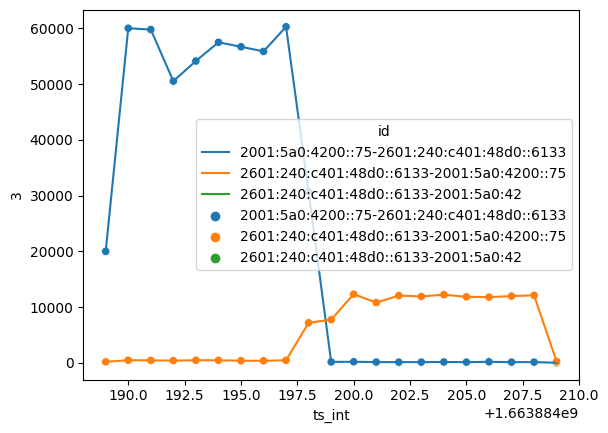

In [47]:
sns.lineplot(data=df_grp, x="ts_int", y=3, hue='id')
sns.scatterplot(data=df_grp, x="ts_int", y=3, hue='id')